In [1]:
# import dependencies
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns

!pip install kmodes
from kmodes.kmodes import KModes

# mount Google Drive to access files
# not needed if running the file locally
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# get the data
# data format - output file from DataCleaning.ipynb
filepath = '/content/drive/Shareddrives/Key Fall 2023/Survey Data//Final code/Clean_Survey_Data.csv'
data = pd.read_csv(filepath)
data.columns

Index(['Unnamed: 0', 'Finished', 'Q2_10_TEXT', 'Q3_9_TEXT', 'Q4', 'Q5', 'Q6',
       'Q8', 'Q9', 'Q10_4_TEXT',
       ...
       'Q31_>180,000', 'Q31_Prefer not to answer', 'Q31_nan', 'Q34_Agender',
       'Q34_Cis-man', 'Q34_Cis-woman', 'Q34_Non-binary',
       'Q34_Prefer not to disclose', 'Q34_Transgender', 'Q34_nan'],
      dtype='object', length=103)

In [3]:
# keep only finished responses who passed the attention check
data = data[data['Finished'] == 1]
data = data[data['Q23'] == 2]
data

,Unnamed: 0,Finished,Q2_10_TEXT,Q3_9_TEXT,Q4,Q5,Q6,Q8,Q9,Q10_4_TEXT,...,"Q31_>180,000",Q31_Prefer not to answer,Q31_nan,Q34_Agender,Q34_Cis-man,Q34_Cis-woman,Q34_Non-binary,Q34_Prefer not to disclose,Q34_Transgender,Q34_nan
0,0,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
1,1,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
2,2,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
3,3,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,0,0,0,1,0,0,0,0,0
4,4,1,NaN,NaN,2,0,NaN,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,1,0,0,0,0,0,1,0,0
172,172,1,NaN,ChatGPT,2,0,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
173,173,1,NaN,NaN,2,1,Excel,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0
174,174,1,NaN,NaN,2,0,NaN,1,1,NaN,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# subset categorical columns of interest
kmodesdata = data.loc[:, ['Q4', 'Q5', 'Q8', 'Q12', 'Q15', 'Q32', 'Q33', \
                          'Q31_100,000 - 120,000', 'Q31_130,000 - 150,000', \
                          'Q31_160,000 - 180,000', 'Q31_45,000 - 75,000', \
                          'Q31_80,000 - 100,000', 'Q31_< 45,000', 'Q31_>180,000', \
                          'Q34_Agender', 'Q34_Cis-man', 'Q34_Cis-woman', 'Q34_Non-binary', \
                          'Q34_Transgender', 'Q2_Apple Pay', 'Q2_CashApp',
                          'Q2_Chime', 'Q2_Google Pay', 'Q2_Mint', 'Q2_PayPal', 'Q2_Robinhood', \
                          'Q2_Venmo', 'Q2_Zelle', 'Q3_Facebook', 'Q3_Family', 'Q3_Instagram', \
                          'Q3_News', 'Q3_Reddit', 'Q3_TikTok', 'Q3_X (formerly known as Twitter)', \
                          'Q3_YouTube', 'Q10_Checking account', 'Q10_Investment portfolio', \
                          'Q10_Savings account', 'Q40_Automated budgeting tool', \
                          'Q40_Automatic rounding to savings account', 'Q40_Check credit reports', \
                          'Q40_I do not use a banking app', 'Q40_Interact with virtual assistant', \
                          'Q40_Locking cards', 'Q40_Manual budgeting by setting spending limits', \
                          'Q40_Mobile check deposit', 'Q40_Recurring payments view', \
                          'Q40_Rewards/Offers', 'Q40_Send money to another individual', \
                          'Q40_Transferring money between your own accounts', \
                          'Q40_Virtual credit/debit cards', \
                          'Q16_A bank of the same size recently collapsed', \
                          'Q16_I became dissatisfied with the service of my current bank', \
                          'Q16_I found a bank with better digital banking services', \
                          'Q16_I found another bank with better rates and lower fees', \
                          'Q16_I would not change my bank']]

# check null values
kmodesdata.isna().sum()

Q4                                                               0
Q5                                                               0
Q8                                                               0
Q12                                                              0
Q15                                                              0
Q32                                                              0
Q33                                                              0
Q31_100,000 - 120,000                                            0
Q31_130,000 - 150,000                                            0
Q31_160,000 - 180,000                                            0
Q31_45,000 - 75,000                                              0
Q31_80,000 - 100,000                                             0
Q31_< 45,000                                                     0
Q31_>180,000                                                     0
Q34_Agender                                                   

In [5]:
kmodesdata.shape

(109, 57)

In [6]:
# define groups of columns
gender_cols = ['Q34_Agender', 'Q34_Cis-man', 'Q34_Cis-woman', 'Q34_Non-binary', 'Q34_Transgender']
app_cols = ['Q2_Apple Pay', 'Q2_CashApp', 'Q2_Chime', 'Q2_Google Pay', 'Q2_Mint', 'Q2_PayPal', 'Q2_Robinhood', 'Q2_Venmo', 'Q2_Zelle']

# function to combine gender factors into respective ordinal columns
copy = kmodesdata.copy()
def combine_factors(column_list):
  subset = copy.loc[:, column_list]
  labels = subset.eq(True) @ subset.columns
  return pd.factorize(labels)[0], pd.factorize(labels)[1]

# create gender factors
genderfactors, genderref = combine_factors(gender_cols)

# create income factors with custom mapping
subset = copy.loc[:, ['Q31_< 45,000', \
'Q31_45,000 - 75,000',\
'Q31_80,000 - 100,000',\
'Q31_100,000 - 120,000',\
'Q31_130,000 - 150,000',\
'Q31_160,000 - 180,000',\
'Q31_>180,000']]
inc = subset.eq(True) @ subset.columns
inc_map = {'Q31_< 45,000': 1, 'Q31_45,000 - 75,000': 2, 'Q31_80,000 - 100,000': 3, 'Q31_100,000 - 120,000': 4, 'Q31_130,000 - 150,000': 5, 'Q31_160,000 - 180,000': 6, 'Q31_>180,000': 7, '': 8}
incomefactors = inc.replace(inc_map)
incomefactors = incomefactors.reset_index(drop=True)

# reset index
kmodesdata = kmodesdata.reset_index()
kmodesdata = kmodesdata.drop(['index'], axis=1)

# add income factors and gender factors columns to the data
incomedf = pd.DataFrame(incomefactors, columns=['Income_Level'])
genderdf = pd.DataFrame(genderfactors, columns=['Gender'])
kmodesdata = pd.concat([kmodesdata, incomedf, genderdf], axis=1)
kmodesdata.head()

,Q4,Q5,Q8,Q12,Q15,Q32,Q33,"Q31_100,000 - 120,000","Q31_130,000 - 150,000","Q31_160,000 - 180,000",...,Q40_Send money to another individual,Q40_Transferring money between your own accounts,Q40_Virtual credit/debit cards,Q16_A bank of the same size recently collapsed,Q16_I became dissatisfied with the service of my current bank,Q16_I found a bank with better digital banking services,Q16_I found another bank with better rates and lower fees,Q16_I would not change my bank,Income_Level,Gender
0,2,0,1,0,4,1.0,2.0,0,0,0,...,1,1,1,0,1,1,1,0,2,0
1,2,0,1,0,2,2.0,2.0,0,0,1,...,0,1,1,0,0,1,1,0,6,0
2,2,0,1,0,1,2.0,2.0,0,0,0,...,1,1,1,0,1,1,1,0,2,0
3,2,0,1,1,1,2.0,3.0,0,0,0,...,1,1,0,1,1,1,1,0,1,1
4,2,0,1,0,1,2.0,2.0,0,0,0,...,0,1,1,0,1,1,0,0,7,0


In [7]:
# column to indicate if they use 4 or more financial apps
kmodesdata['Fin_Apps'] = (kmodesdata[app_cols].values.sum(1) >= 4) *1

# column to indicate if they use at least 3 social media/internet sources for information
kmodesdata['Learn_SMInt'] = (kmodesdata[['Q3_Facebook', 'Q3_Instagram', 'Q3_Reddit', 'Q3_TikTok', 'Q3_X (formerly known as Twitter)', \
            'Q3_YouTube']].values.sum(1) >= 3) * 1

# column to indicate if they learn from family
kmodesdata['Learn_Family'] = kmodesdata['Q3_Family'].values

# column to indicate if they learn from news
kmodesdata['Learn_News'] = kmodesdata['Q3_News'].values

# column to indicate if they would not switch banks
kmodesdata['Not_Switch_Banks'] = kmodesdata['Q16_I would not change my bank'].values

# column to indicate if they use at least 3 basic features
kmodesdata['Basic_Features'] = (kmodesdata[['Q40_Check credit reports', 'Q40_Locking cards', 'Q40_Mobile check deposit', 'Q40_Rewards/Offers', \
                                           'Q40_Transferring money between your own accounts']].values.sum(1) >=3) * 1

# column to indicate if they use at least 3 advanced features
kmodesdata['Adv_Features'] = (kmodesdata[['Q40_Automated budgeting tool', 'Q40_Automatic rounding to savings account', \
                                         'Q40_Interact with virtual assistant', 'Q40_Manual budgeting by setting spending limits', \
                                         'Q40_Recurring payments view', 'Q40_Send money to another individual', \
                                         'Q40_Virtual credit/debit cards']].values.sum(1) >=3) * 1

# drop columns that are now combined/recoded
kmodesdata = kmodesdata.drop(['Q31_< 45,000', 'Q31_45,000 - 75,000', 'Q31_80,000 - 100,000', 'Q31_100,000 - 120,000', 'Q31_130,000 - 150,000', \
                              'Q31_160,000 - 180,000', 'Q31_>180,000', 'Q34_Agender', 'Q34_Cis-man', 'Q34_Cis-woman', 'Q34_Non-binary', \
                              'Q34_Transgender','Q2_Apple Pay', 'Q2_CashApp', 'Q2_Chime', 'Q2_Google Pay', 'Q2_Mint', \
                              'Q2_PayPal', 'Q2_Robinhood', 'Q2_Venmo', 'Q2_Zelle', 'Q3_Facebook', 'Q3_Family', \
                              'Q3_Instagram', 'Q3_News', 'Q3_Reddit', 'Q3_TikTok', 'Q3_X (formerly known as Twitter)', 'Q3_YouTube', \
                              'Q40_Automated budgeting tool', 'Q40_Automatic rounding to savings account', 'Q40_Check credit reports', \
                              'Q40_I do not use a banking app', 'Q40_Interact with virtual assistant', 'Q40_Locking cards', \
                              'Q40_Manual budgeting by setting spending limits', 'Q40_Mobile check deposit', 'Q40_Recurring payments view', \
                              'Q40_Rewards/Offers', 'Q40_Send money to another individual', 'Q40_Transferring money between your own accounts', \
                              'Q40_Virtual credit/debit cards', 'Q16_A bank of the same size recently collapsed', \
                              'Q16_I became dissatisfied with the service of my current bank', \
                              'Q16_I found a bank with better digital banking services', \
                              'Q16_I found another bank with better rates and lower fees', 'Q16_I would not change my bank', 'Q8'], axis = 1)
kmodesdata

,Q4,Q5,Q12,Q15,Q32,Q33,Q10_Checking account,Q10_Investment portfolio,Q10_Savings account,Income_Level,Gender,Fin_Apps,Learn_SMInt,Learn_Family,Learn_News,Not_Switch_Banks,Basic_Features,Adv_Features
0,2,0,0,4,1.0,2.0,1,0,1,2,0,0,0,1,1,0,0,0
1,2,0,0,2,2.0,2.0,1,0,0,6,0,1,1,1,1,0,1,0
2,2,0,0,1,2.0,2.0,1,1,1,2,0,1,0,1,0,0,1,1
3,2,0,1,1,2.0,3.0,1,0,1,1,1,0,1,0,1,0,1,1
4,2,0,0,1,2.0,2.0,1,0,0,7,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2,0,0,2,2.0,2.0,0,0,1,8,4,1,0,1,0,0,0,0
105,2,0,0,4,3.0,1.0,1,0,1,2,0,0,0,1,0,0,0,0
106,2,1,0,4,3.0,3.0,1,1,1,3,0,1,0,1,0,0,1,1
107,2,0,0,0,1.0,2.0,1,0,0,1,0,0,0,1,0,0,0,0


In [8]:
# generate clusters
numclusters = 3
kcao = KModes(n_clusters = numclusters, init='Cao', verbose=1)
kcaofit = kcao.fit_predict(kmodesdata)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 640.0
Run 1, iteration: 2/100, moves: 11, cost: 627.0
Run 1, iteration: 3/100, moves: 3, cost: 627.0


In [9]:
# add cluster labels to the data
kmodesdata['cluster'] = kcaofit
kmodesdata.columns

Index(['Q4', 'Q5', 'Q12', 'Q15', 'Q32', 'Q33', 'Q10_Checking account',
       'Q10_Investment portfolio', 'Q10_Savings account', 'Income_Level',
       'Gender', 'Fin_Apps', 'Learn_SMInt', 'Learn_Family', 'Learn_News',
       'Not_Switch_Banks', 'Basic_Features', 'Adv_Features', 'cluster'],
      dtype='object')

In [10]:
# rename columns to meaningful names
kmodesdata = kmodesdata.rename(columns={'Q4': 'Uses_BankApp', 'Q5': 'Uses_BudgetTool', 'Q12': 'Multiple_Acc', 'Q15': 'BankVisit_Freq', \
                                        'Q32': 'Age', 'Q33': 'Education', 'Q10_Checking account': 'Has_Checking_Acc', 'Q10_Investment portfolio': 'Has_Inv_Portfolio', 'Q10_Savings account': 'Has_Savings_Acc'})
kmodesdata

,Uses_BankApp,Uses_BudgetTool,Multiple_Acc,BankVisit_Freq,Age,Education,Has_Checking_Acc,Has_Inv_Portfolio,Has_Savings_Acc,Income_Level,Gender,Fin_Apps,Learn_SMInt,Learn_Family,Learn_News,Not_Switch_Banks,Basic_Features,Adv_Features,cluster
0,2,0,0,4,1.0,2.0,1,0,1,2,0,0,0,1,1,0,0,0,0
1,2,0,0,2,2.0,2.0,1,0,0,6,0,1,1,1,1,0,1,0,0
2,2,0,0,1,2.0,2.0,1,1,1,2,0,1,0,1,0,0,1,1,0
3,2,0,1,1,2.0,3.0,1,0,1,1,1,0,1,0,1,0,1,1,1
4,2,0,0,1,2.0,2.0,1,0,0,7,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2,0,0,2,2.0,2.0,0,0,1,8,4,1,0,1,0,0,0,0,0
105,2,0,0,4,3.0,1.0,1,0,1,2,0,0,0,1,0,0,0,0,0
106,2,1,0,4,3.0,3.0,1,1,1,3,0,1,0,1,0,0,1,1,1
107,2,0,0,0,1.0,2.0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [11]:
# print proportions of categorical distributions in each cluster
for i in range(3):
  print('------------' + 'CLUSTER {}'.format(i) + '------------')
  for col in kmodesdata.columns:
    individual_cluster = kmodesdata[kmodesdata['cluster'] == i]
    percentages = individual_cluster[col].value_counts(normalize=True)
    print('column: {}'.format(col))
    print(percentages.sort_values())

------------CLUSTER 0------------
column: Uses_BankApp
1    0.016667
2    0.983333
Name: Uses_BankApp, dtype: float64
column: Uses_BudgetTool
1    0.15
0    0.85
Name: Uses_BudgetTool, dtype: float64
column: Multiple_Acc
1    0.333333
0    0.666667
Name: Multiple_Acc, dtype: float64
column: BankVisit_Freq
1    0.050000
3    0.066667
4    0.183333
2    0.250000
0    0.450000
Name: BankVisit_Freq, dtype: float64
column: Age
0.0    0.016667
6.0    0.066667
7.0    0.066667
5.0    0.083333
4.0    0.083333
3.0    0.133333
1.0    0.150000
2.0    0.400000
Name: Age, dtype: float64
column: Education
5.0    0.016667
1.0    0.100000
3.0    0.166667
4.0    0.166667
2.0    0.550000
Name: Education, dtype: float64
column: Has_Checking_Acc
0    0.083333
1    0.916667
Name: Has_Checking_Acc, dtype: float64
column: Has_Inv_Portfolio
1    0.3
0    0.7
Name: Has_Inv_Portfolio, dtype: float64
column: Has_Savings_Acc
0    0.3
1    0.7
Name: Has_Savings_Acc, dtype: float64
column: Income_Level
6    0.083333

([<matplotlib.patches.Wedge at 0x7d03be53bc40>,
 [Text(-1.1849542451674462, -0.18942923971670336, 'Persona 1'),
  Text(1.0177775132658275, -0.4172875908656141, 'Persona 2'),
  Text(0.572719558360983, 0.939144455060456, 'Persona 3')],
 [Text(-0.6912233096810101, -0.11050038983474361, '55%'),
  Text(0.5551513708722695, -0.22761141319942585, '28%'),
  Text(0.3123924863787179, 0.5122606118511577, '17%')])

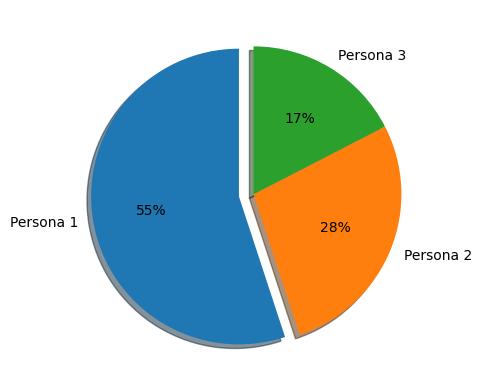

In [12]:
# plot percentage of respondents in each cluster
num_cluster1 = len(kmodesdata[kmodesdata['cluster'] == 0])
num_cluster2 = len(kmodesdata[kmodesdata['cluster'] == 1])
num_cluster3 = len(kmodesdata[kmodesdata['cluster'] == 2])
labels = 'Persona 1', 'Persona 2', 'Persona 3'
sizes = [num_cluster1, num_cluster2, num_cluster3]
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=90, explode=explode, shadow=True)

<ipython-input-13-38f13c214394>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18', '18', '19', '20', '21', '22', '23', '24', '25 and older'])


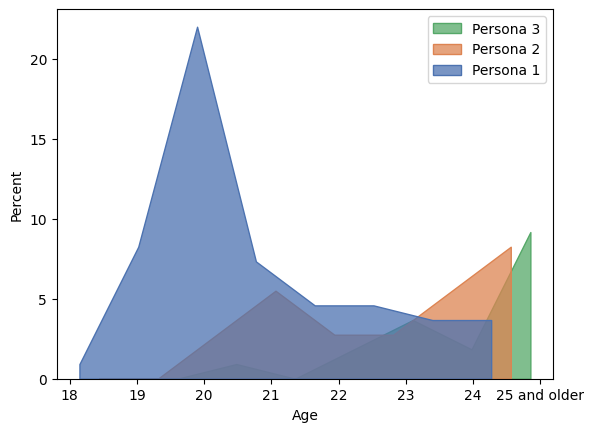

In [13]:
# plot variable-wise distributions in the cluters
fig, ax =plt.subplots()
# Age
sns.histplot(kmodesdata, x='Age', hue='cluster', stat='percent', palette='deep', multiple='dodge', element='poly', ax=ax)
ax.set_xticklabels(['18', '18', '19', '20', '21', '22', '23', '24', '25 and older'])
ax.legend(['Persona 3', 'Persona 2', 'Persona 1'])
fig.show()

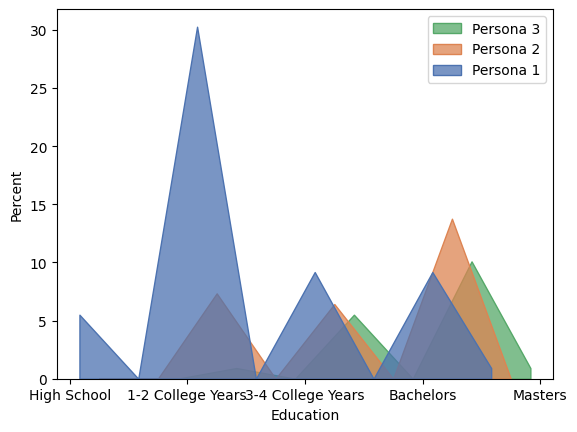

In [14]:
fig, ax =plt.subplots()
# Education
sns.histplot(kmodesdata, x='Education', hue='cluster', stat='percent', palette='deep', multiple='dodge', element='poly', ax=ax)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['High School', '1-2 College Years', '3-4 College Years', 'Bachelors', 'Masters'])
ax.legend(['Persona 3', 'Persona 2', 'Persona 1'])
fig.show()

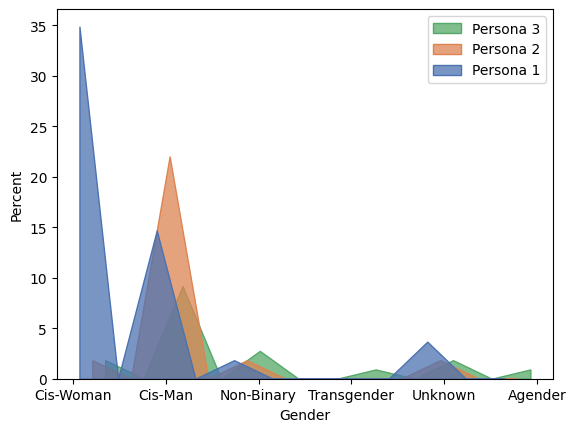

In [15]:
fig, ax =plt.subplots()
# Gender
sns.histplot(kmodesdata, x='Gender', hue='cluster', stat='percent', palette='deep', multiple='dodge', element='poly', ax=ax)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['Cis-Woman', 'Cis-Man', 'Non-Binary', 'Transgender', 'Unknown', 'Agender'])
ax.legend(['Persona 3', 'Persona 2', 'Persona 1'])
fig.show()

<ipython-input-16-049a0dee2226>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['< \$45k', '< \$45k', \


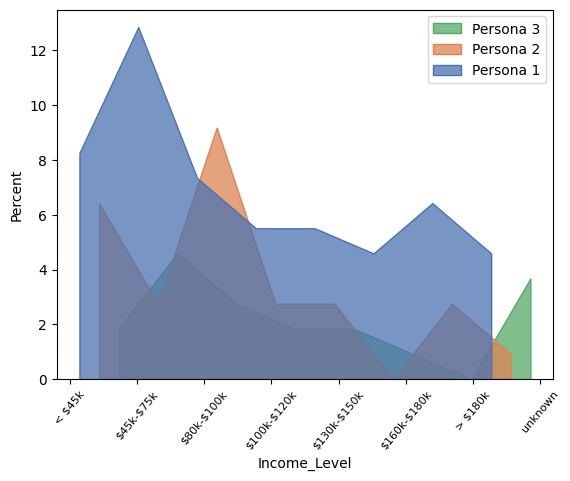

In [16]:
fig, ax =plt.subplots()
# Household Income
sns.histplot(kmodesdata, x='Income_Level', hue='cluster', stat='percent', palette='deep', multiple='dodge', element='poly', ax=ax)
ax.tick_params(axis='x', labelsize=8, labelrotation=50)
ax.set_xticklabels(['< \$45k', '< \$45k', \
 '\$45k-\$75k',\
 '\$80k-\$100k',\
 '\$100k-\$120k',\
 '\$130k-\$150k',\
 '\$160k-\$180k',\
 '> \$180k', 'unknown'])
ax.legend(['Persona 3', 'Persona 2', 'Persona 1'])

fig.show()

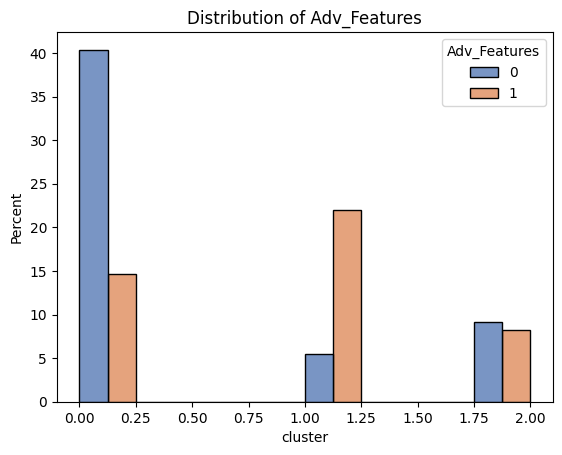

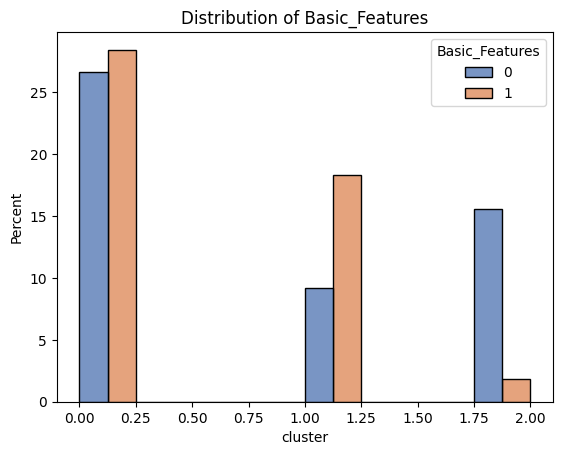

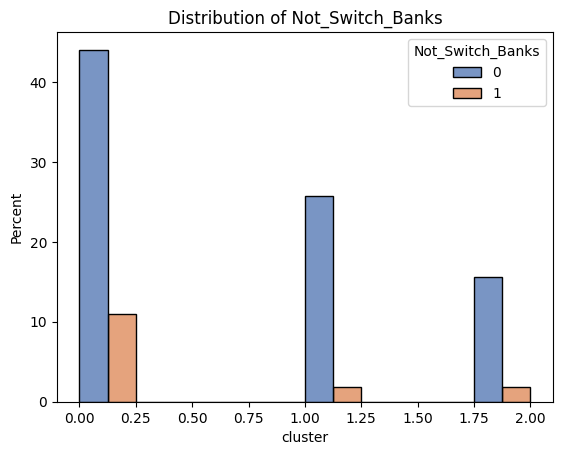

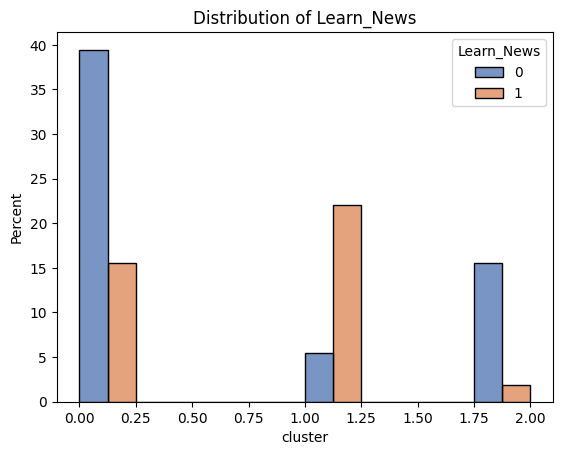

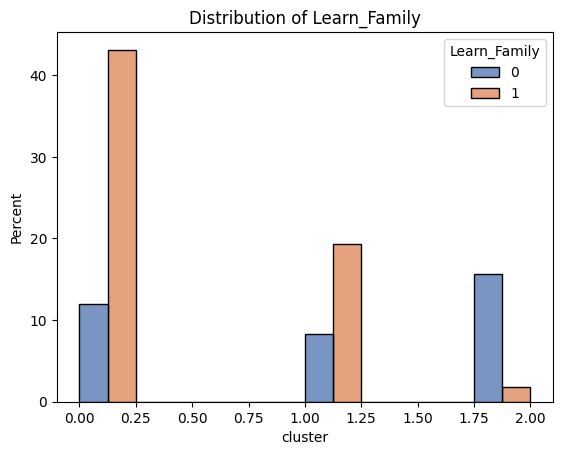

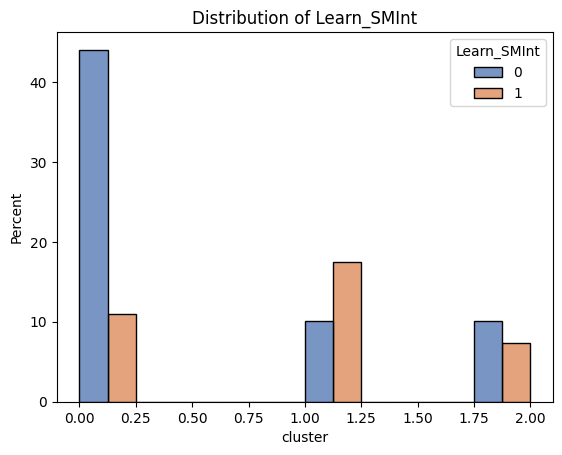

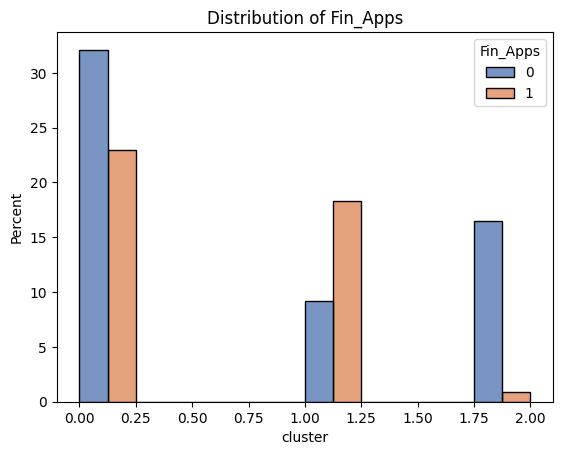

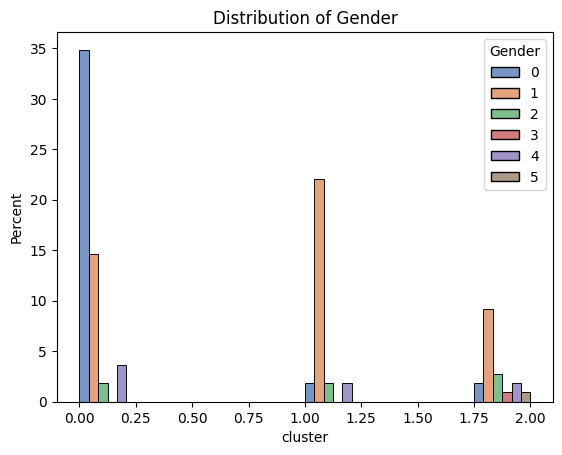

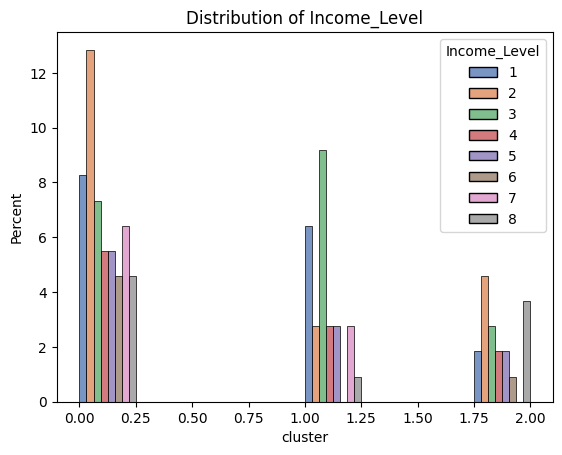

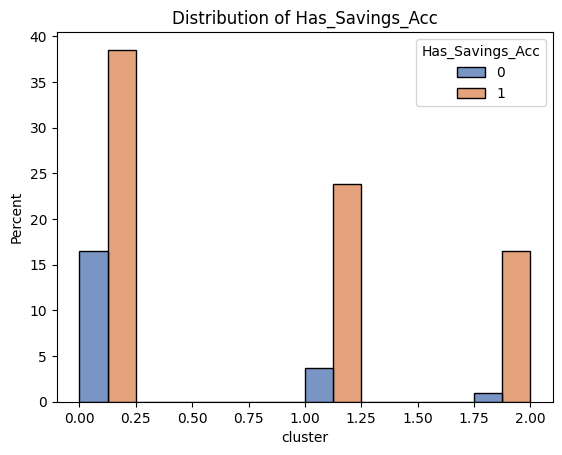

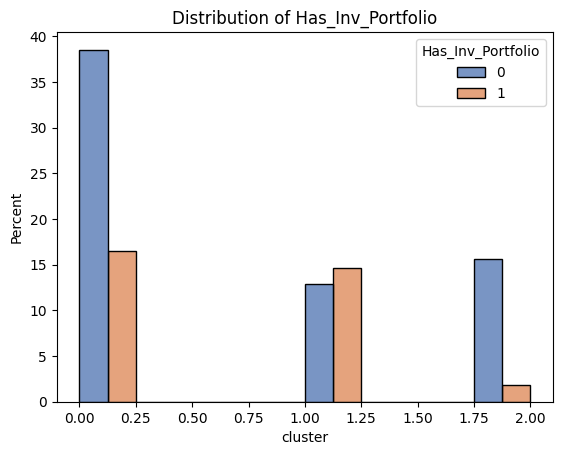

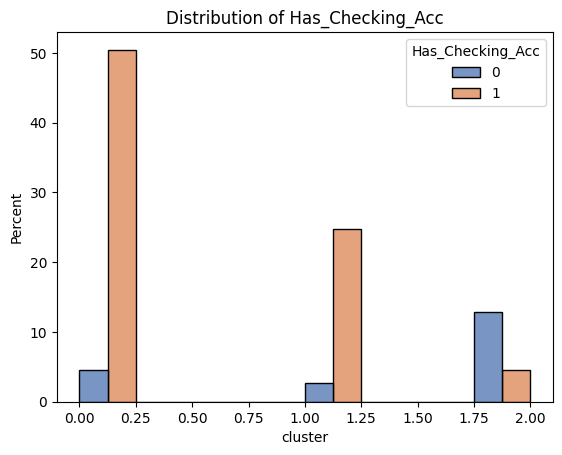

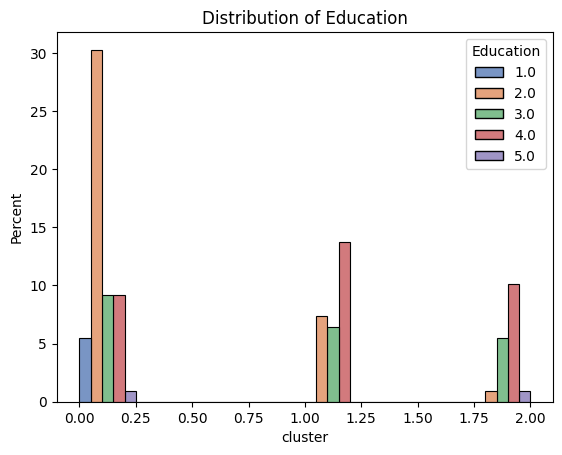

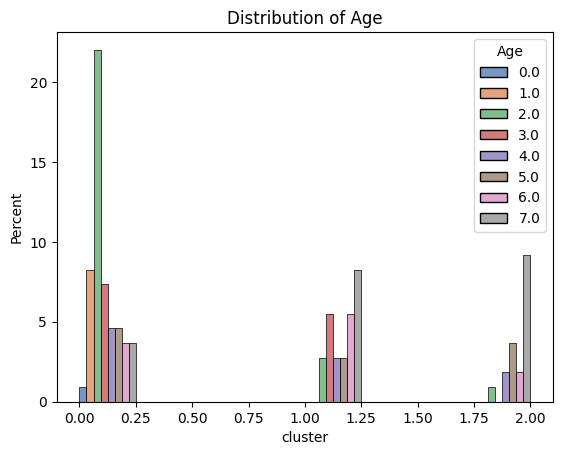

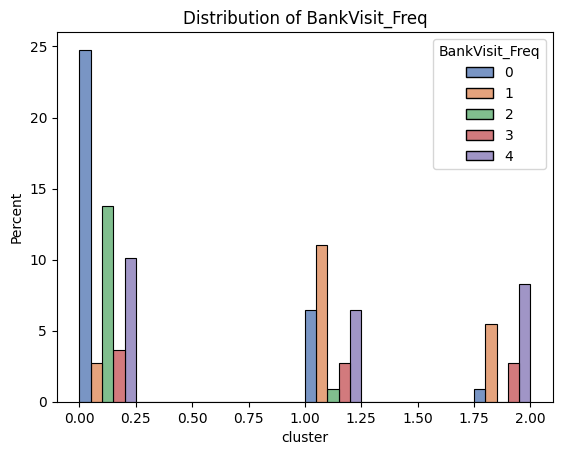

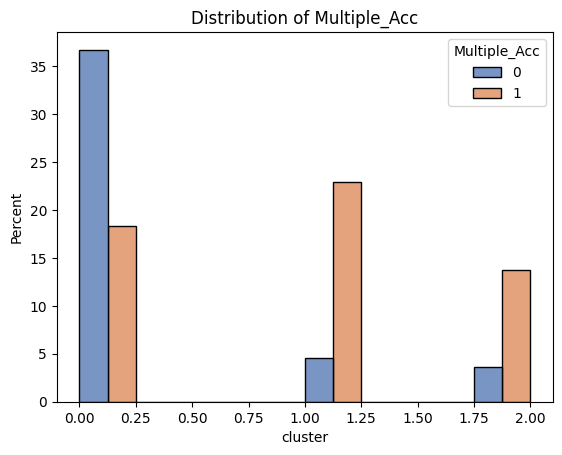

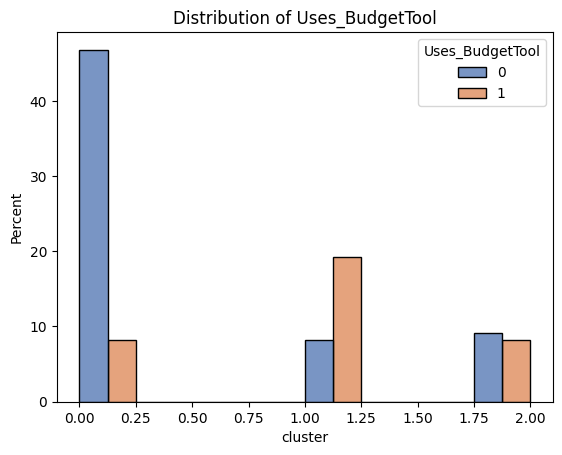

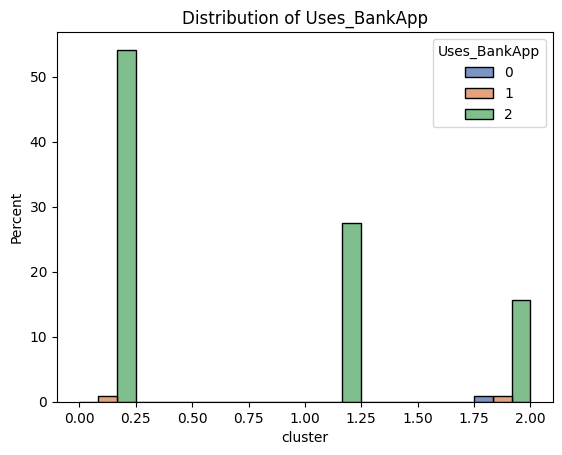

In [17]:
# plots for all variables
for i in kmodesdata.columns[::-1][1:]:
  plt.figure()
  sns.histplot(data=kmodesdata, x='cluster', multiple='dodge', stat='percent',hue=i, palette='deep').set(title='Distribution of {}'.format(i))
  plt.show()